In [1]:
from github import Github
import numpy as np
import pandas as pd

## Retrieving Issue Data
For data retrieval, the library PyGithub has been used (download command: pip install PyGithub). This analysis involves the issues that are open for a long time, because of that only the issues having status ***open*** are used. The data retrieval is performed in the following cell.

In [2]:
gthub = Github('*** add token here ***')
repo = gthub.get_repo('twbs/bootstrap')
issues = repo.get_issues(state = 'open')
print('Total number of open issues: ' + str(issues.totalCount))

Total number of open issues: 393


### Checking creation times of the issues
The creation times of the issues are checked by using the **created_at** attribute of the ***Issue*** class of PyGithub. The mapping performed is as follows. After performing the mapping, the issues are shown in a table showing the creation time of the issue and the corresponding issue number.

In [3]:
import datetime as dtime
issue_date_map = []
for issue in issues:
    created_date = issue.created_at
    date = dtime.datetime(created_date.year, created_date.month, created_date.day)
    issue_date_map.append((issue.number, date))
## A sample entry
print('Sample creation time entry: ' + str(issue_date_map[0]))

Sample creation time entry: (30726, datetime.datetime(2020, 5, 4, 0, 0))


In [4]:
date_frame = pd.DataFrame(data = issue_date_map, columns = ['Issue Number', 'Issue Date'])
date_frame

,Issue Number,Issue Date
0,30726,2020-05-04
1,30725,2020-05-04
2,30718,2020-05-04
3,30717,2020-05-04
4,30710,2020-05-03
...,...,...
388,19415,2016-03-05
389,19145,2016-02-10
390,18268,2015-11-16
391,17496,2015-09-06


Then, the cumulative issue counts are calculated for each day.

In [5]:
date_frequency = date_frame['Issue Date'].value_counts()
freq_pairs = zip(date_frequency.index, date_frequency.values)
freq_pairs = sorted(freq_pairs, key = lambda x: x[0], reverse = True)

In [6]:
from dateutil.relativedelta import relativedelta
def count_issues(pairs, date):
    count = 0
    idx = 0
    for pair in pairs:
        if pair[0] >= date:
            count += pair[1]
            idx += 1
        else:
            return (count, idx)
    return (count, idx)

last_date = freq_pairs[-1][0]
reference_date = dtime.datetime.now()
frequencies = []
idx = 0
while reference_date >= last_date:
    reference_date = reference_date - relativedelta(months = 1)
    count = count_issues(freq_pairs[idx:], reference_date)
    idx += count[1]
    frequencies.append(count[0])

The analysis is performed in a monthly basis. After the analysis an histogram is created and the ratios are observed by setting the threshold as:
- 6 months
- 12 months
- 18 months 

Text(0.5, 0, 'Months passed since 2020-05-05 14:24:29.210614')

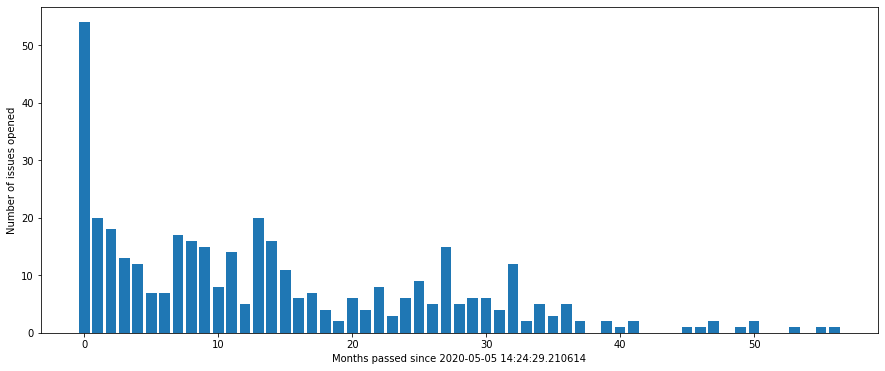

In [7]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize = (15,6))
ax.bar(range(len(frequencies)), frequencies)
ax.set_ylabel('Number of issues opened')
ax.set_xlabel('Months passed since ' + str(dtime.datetime.now()))

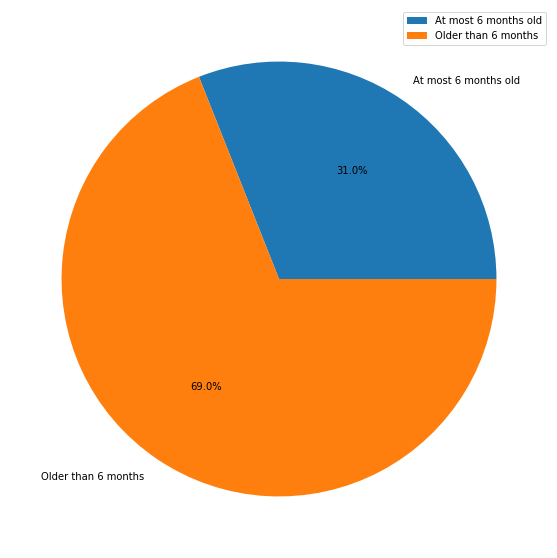

In [8]:
## Setting threshold to 6 months
sum_1 = int((sum(frequencies[0:6]) / sum(frequencies)) * 100)
sum_2 = 100 - sum_1
fig, ax = plt.subplots(figsize = (10,10))
ax.pie((sum_1, sum_2), autopct='%1.1f%%', labels = ['At most 6 months old', 'Older than 6 months'])
ax.legend()

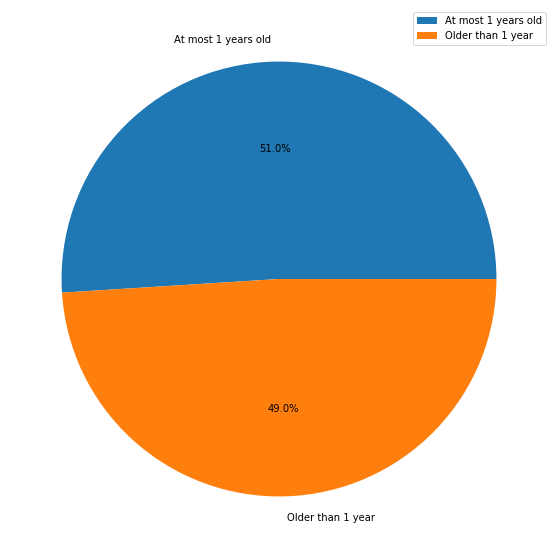

In [9]:
## Setting threshold to 1 year
sum_1 = int((sum(frequencies[0:12]) / sum(frequencies)) * 100)
sum_2 = 100 - sum_1
fig, ax = plt.subplots(figsize = (10,10))
ax.pie((sum_1, sum_2), autopct='%1.1f%%', labels = ['At most 1 years old', 'Older than 1 year'])
ax.legend()

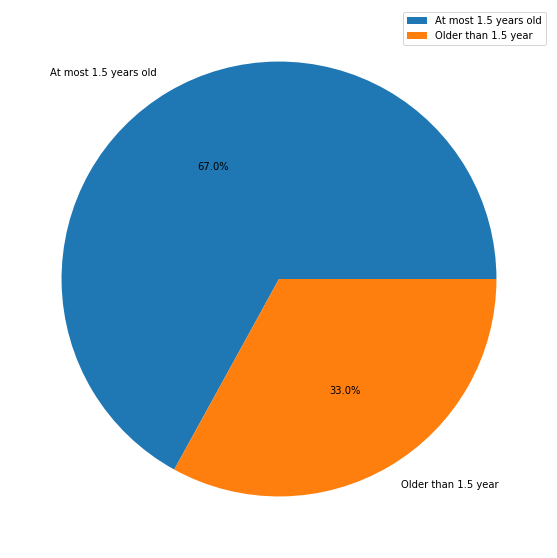

In [10]:
## Setting threshold to 18 months
sum_1 = int((sum(frequencies[0:18]) / sum(frequencies)) * 100)
sum_2 = 100 - sum_1
fig, ax = plt.subplots(figsize = (10,10))
ax.pie((sum_1, sum_2), autopct='%1.1f%%', labels = ['At most 1.5 years old', 'Older than 1.5 year'])
ax.legend()